In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [101]:
df = pd.read_csv('cardio_train.csv', delimiter=';')
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [102]:
df.shape

(69301, 13)

In [103]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [104]:
df.drop_duplicates(inplace=True)
df.shape

(69301, 13)

In [105]:
df['age'] = df['age'] / 365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


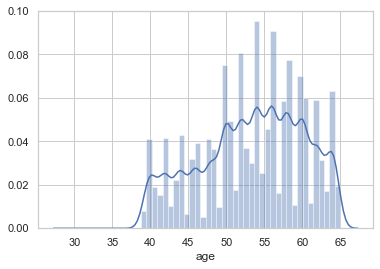

In [106]:
sns.distplot(df['age'])

In [107]:
df['age range'] = pd.cut(df.age, [0, 18, 40, 65, 100], include_lowest=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,"(40.0, 65.0]"
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,"(40.0, 65.0]"
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]"
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0,"(18.0, 40.0]"
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]"


In [108]:
df['age range'].value_counts()

(40.0, 65.0]      67529
(18.0, 40.0]       1772
(65.0, 100.0]         0
(-0.001, 18.0]        0
Name: age range, dtype: int64

All adult population and no one above age 65

In [109]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

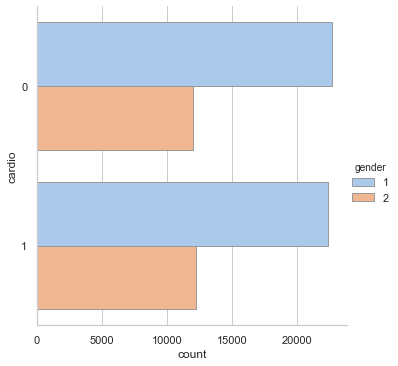

In [110]:
sns.catplot(y="cardio", hue="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

More numner of males in dataset influencing this

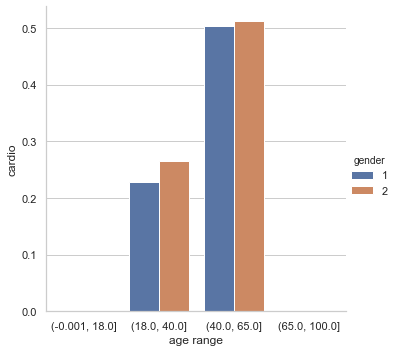

In [111]:
sns.catplot(x="age range", y="cardio", hue="gender", kind="bar", data=df, ci=None)

Females seem to be more prone to cardio

In [112]:
df['height'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00     55.0
0.10    155.0
0.25    159.0
0.50    165.0
0.75    170.0
0.90    175.0
1.00    250.0
Name: height, dtype: float64

In [113]:
df['height range'] = pd.cut(df.height, [0, 100, 150, 200, 255], include_lowest=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]"
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]"
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]"
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0,"(18.0, 40.0]","(150.0, 200.0]"
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]"


In [114]:
df['height range'].value_counts()

(150.0, 200.0]     66741
(100.0, 150.0]      2527
(-0.001, 100.0]       31
(200.0, 255.0]         2
Name: height range, dtype: int64

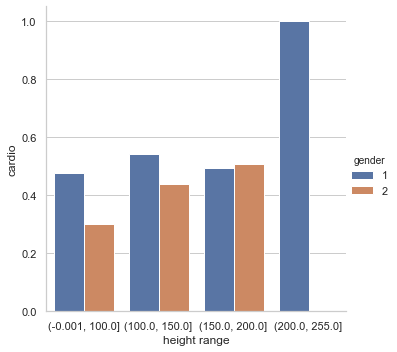

In [115]:
sns.catplot(x="height range", y="cardio", hue="gender", kind="bar", data=df, ci=None)

**Form research questions based on plot**

In [116]:
df['bmi'] = (df['weight'] * 10000) / (df['height'] * df['height'])
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range,bmi
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",28.720083
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",26.722873
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",25.711662
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0,"(18.0, 40.0]","(150.0, 200.0]",31.221304
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",25.806452


In [117]:
df['bmi'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00      3.471784
0.10     22.074100
0.25     23.875115
0.50     26.370238
0.75     30.222222
0.90     34.527089
1.00    298.666667
Name: bmi, dtype: float64

Usual BMI value falls within 18 to 25

In [118]:
df['bmi range'] = pd.cut(df.bmi, [0, 18, 25, 30, 300], include_lowest=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range,bmi,bmi range
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",28.720083,"(25.0, 30.0]"
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",26.722873,"(25.0, 30.0]"
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",25.711662,"(25.0, 30.0]"
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0,"(18.0, 40.0]","(150.0, 200.0]",31.221304,"(30.0, 300.0]"
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",25.806452,"(25.0, 30.0]"


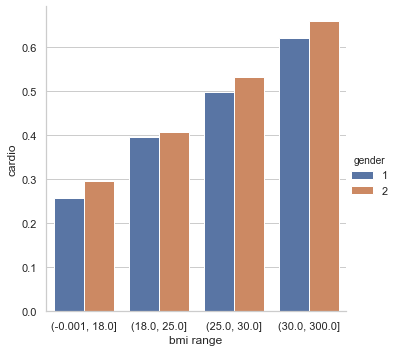

In [119]:
sns.catplot(x="bmi range", y="cardio", hue="gender", kind="bar", data=df, ci=None)

Even over here we can see that Females are more prone. BMI over 30 needs to be analyzed seperately

Text(0.5, 1.0, 'bmi Distribution')

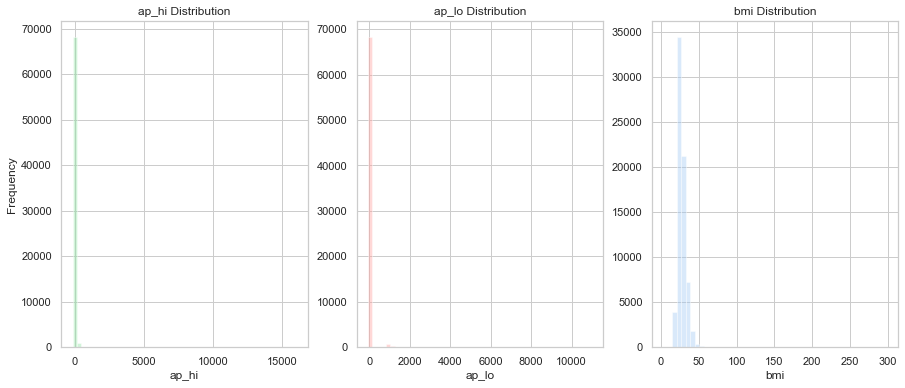

In [120]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# ap_hi
sns.distplot(df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')


# bmi
sns.distplot(df.bmi, kde=False, color="b", ax=axes[2]).set_title('bmi Distribution')

**Analyze outliers in each of these cases**

In [121]:
df[df['bmi']>50]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range,bmi,bmi range
87,1098,51.906849,1,152,124.0,120,80,2,2,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",53.670360,"(30.0, 300.0]"
257,1330,52.273973,1,156,123.0,150,90,1,1,0,0,0,1,"(40.0, 65.0]","(150.0, 200.0]",50.542406,"(30.0, 300.0]"
899,2258,44.134247,1,160,150.0,120,80,2,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",58.593750,"(30.0, 300.0]"
1638,3295,60.378082,1,164,141.0,120,80,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",52.424152,"(30.0, 300.0]"
1641,3298,57.501370,1,160,150.0,160,75,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",58.593750,"(30.0, 300.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68136,98348,61.915068,1,154,125.0,140,80,3,3,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",52.707033,"(30.0, 300.0]"
68353,98630,55.893151,2,120,80.0,140,90,1,2,0,0,1,1,"(40.0, 65.0]","(100.0, 150.0]",55.555556,"(30.0, 300.0]"
68410,98709,52.265753,2,175,155.0,110,100,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",50.612245,"(30.0, 300.0]"
69009,99562,58.512329,1,144,115.0,140,90,1,1,0,1,0,1,"(40.0, 65.0]","(100.0, 150.0]",55.459105,"(30.0, 300.0]"


There are cases where height is less than 100 but weight is more than 100

**Check how Removing outliers changes the distribution**

In [122]:
trimmed_df = df[df['bmi'] < df['bmi'].quantile(0.95)]
trimmed_df.shape

(65833, 17)

Text(0.5, 1.0, 'ap_lo Distribution')

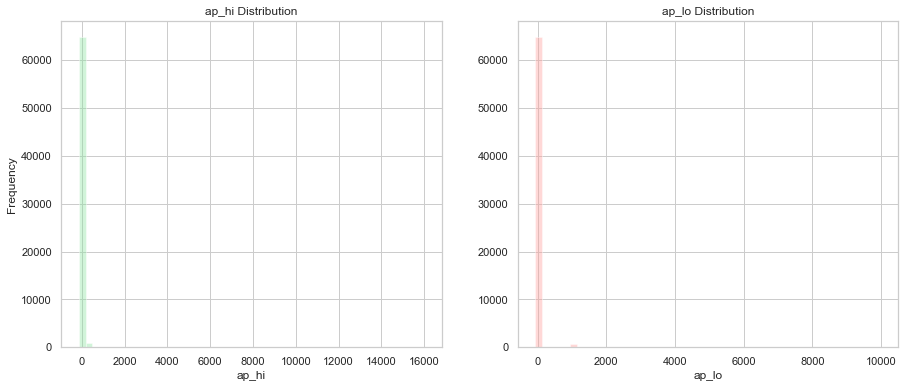

In [123]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# ap_hi
sns.distplot(trimmed_df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(trimmed_df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')

In [124]:
trimmed_df = trimmed_df[trimmed_df['ap_hi'] < trimmed_df['ap_hi'].quantile(0.95)]
trimmed_df.shape

(61526, 17)

Text(0.5, 1.0, 'ap_lo Distribution')

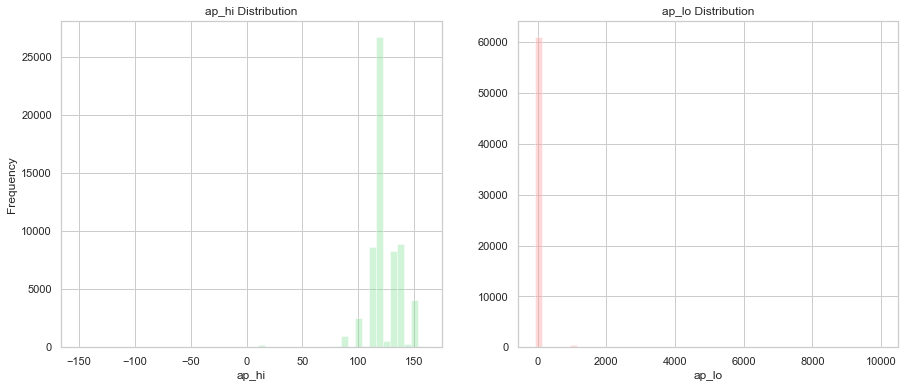

In [125]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# ap_hi
sns.distplot(trimmed_df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(trimmed_df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')

In [126]:
df[df['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range,bmi,bmi range
3908,6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",28.650138,"(25.0, 30.0]"
15322,22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",34.720883,"(30.0, 300.0]"
19837,29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",23.068051,"(18.0, 25.0]"
23289,34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",28.196921,"(25.0, 30.0]"
24541,36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1,"(40.0, 65.0]","(150.0, 200.0]",17.715420,"(-0.001, 18.0]"
34341,50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",20.904195,"(18.0, 25.0]"
45928,66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0,"(40.0, 65.0]","(150.0, 200.0]",23.046875,"(18.0, 25.0]"


In [127]:
trimmed_df = trimmed_df[trimmed_df['ap_lo'] < trimmed_df['ap_lo'].quantile(0.95)]
trimmed_df.shape

(46763, 17)

Text(0.5, 1.0, 'ap_lo Distribution')

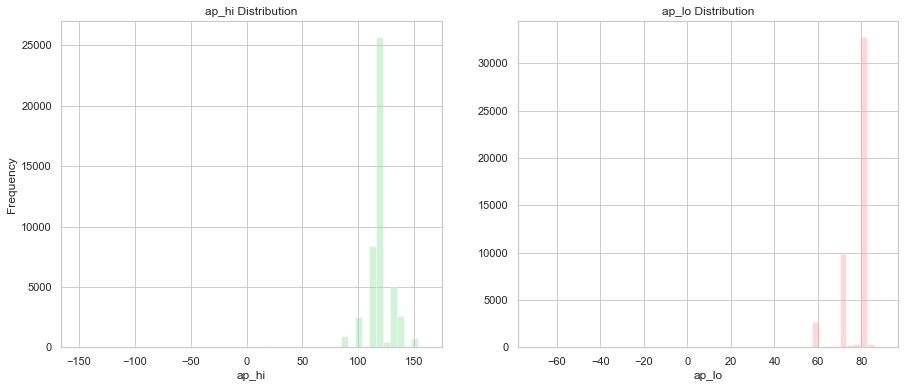

In [128]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# ap_hi
sns.distplot(trimmed_df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(trimmed_df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')

WHen checked on the internet negative values are possible. Since tree models are good at handling outliers we don't need to worry about other skewness but need to remove correlated features

Removing extreme values since previous model was overfitting

In [129]:
trimmed_df=df[df['ap_lo']<1500]
trimmed_df=trimmed_df[trimmed_df['ap_hi']<1000]

Text(0.5, 1.0, 'ap_lo Distribution')

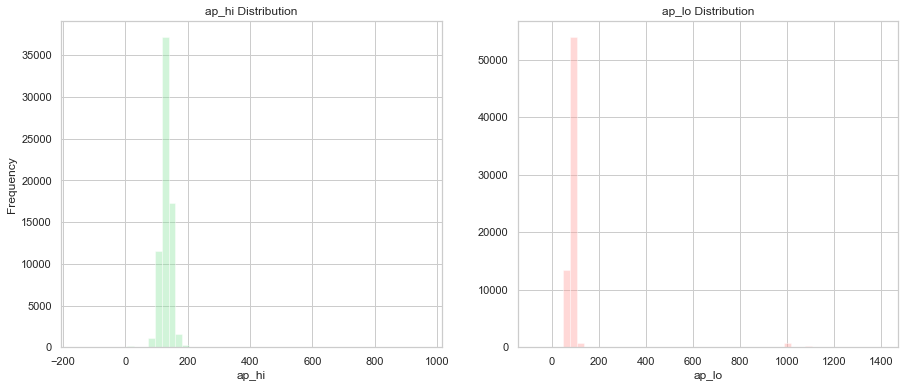

In [130]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# ap_hi
sns.distplot(trimmed_df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(trimmed_df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')

In [131]:
trimmed_df[(trimmed_df['ap_lo']>300)&(trimmed_df['ap_lo']<1000)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age range,height range,bmi,bmi range
6766,10644,62.134247,1,154,84.0,140,902,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",35.419126,"(30.0, 300.0]"
8156,12626,39.197260,1,165,65.0,120,802,1,1,0,0,0,1,"(18.0, 40.0]","(150.0, 200.0]",23.875115,"(18.0, 25.0]"
9622,14728,55.410959,1,165,65.0,120,850,1,1,0,0,0,1,"(40.0, 65.0]","(150.0, 200.0]",23.875115,"(18.0, 25.0]"
10158,15529,53.583562,1,164,85.0,160,708,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",31.603212,"(30.0, 300.0]"
14384,21573,50.493151,1,155,56.0,140,709,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",23.309053,"(18.0, 25.0]"
14866,22240,39.849315,2,176,67.0,130,708,1,2,1,1,1,0,"(18.0, 40.0]","(150.0, 200.0]",21.629649,"(18.0, 25.0]"
15767,23523,56.446575,1,165,62.0,120,800,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",22.773186,"(18.0, 25.0]"
16674,24824,51.997260,1,157,69.0,112,800,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",27.993022,"(25.0, 30.0]"
19217,28435,62.041096,1,160,60.0,120,850,1,1,0,0,1,1,"(40.0, 65.0]","(150.0, 200.0]",23.437500,"(18.0, 25.0]"
20550,30356,44.416438,1,173,78.0,110,710,1,1,0,0,1,0,"(40.0, 65.0]","(150.0, 200.0]",26.061679,"(25.0, 30.0]"


**Removing outliers**

In [132]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age range',
       'height range', 'bmi', 'bmi range'],
      dtype='object')

In [133]:
df['ap_lo'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

0.00      -70.0
0.10       70.0
0.25       80.0
0.50       80.0
0.75       90.0
0.90       90.0
0.95      100.0
1.00    11000.0
Name: ap_lo, dtype: float64

In [134]:
df=df[df['ap_lo']<150]
df=df[df['ap_hi']<1000]
df=df[df['bmi']<100]

Text(0.5, 1.0, 'bmi Distribution')

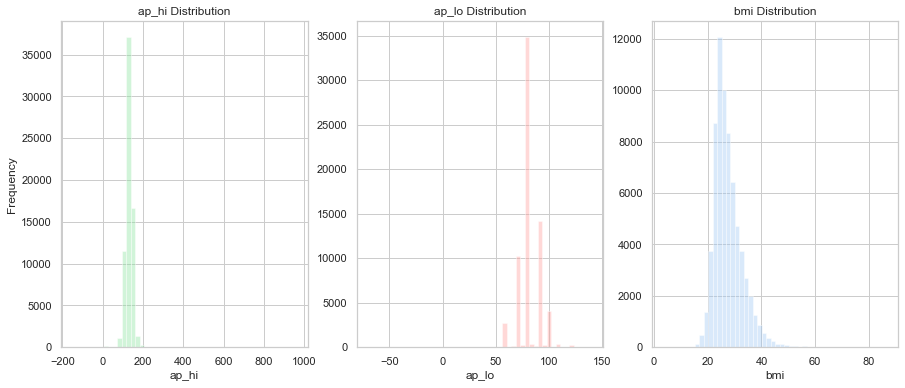

In [160]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# ap_hi
sns.distplot(df.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(df.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')


# bmi
sns.distplot(df.bmi, kde=False, color="b", ax=axes[2]).set_title('bmi Distribution')

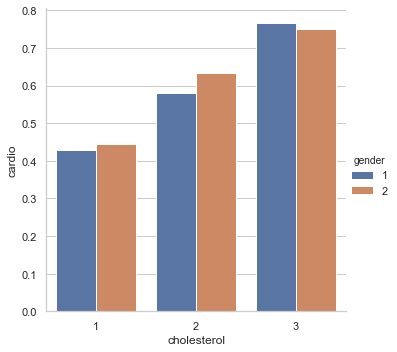

In [135]:
sns.catplot(x="cholesterol", y="cardio", hue="gender", kind="bar", data=df, ci=None)

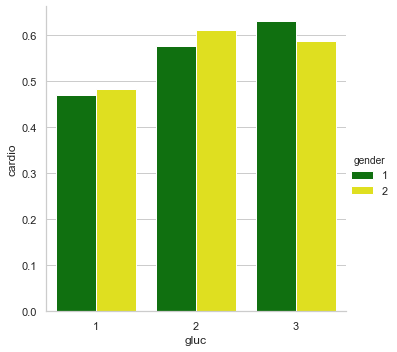

In [136]:
sns.catplot(x="gluc", y="cardio", hue="gender", kind="bar", data=df, ci=None, palette=sns.color_palette(['green', 'yellow']))

In [137]:
df=df[['id','age','gender','bmi','ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco','active', 'cardio']]

In [138]:
df.isnull().sum()

id             0
age            0
gender         0
bmi            0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [139]:
df.dtypes

id               int64
age            float64
gender           int64
bmi            float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Create dummy variables

In [140]:
cat_var = ['cholesterol', 'gluc']
df[cat_var]=df[cat_var].astype('object')
num_var=[]
for ls in df.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(df[cat_var],drop_first=True)
numerical_df = df[num_var]

data = pd.concat([numerical_df,categorical_df], axis=1)
data.head()

,id,age,gender,bmi,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,988,61.558904,1,28.720083,130,80,0,0,1,0,1,0,1,0
1,989,40.131507,1,26.722873,110,70,0,0,1,1,0,0,0,0
2,990,60.002740,1,25.711662,120,80,0,0,1,0,0,0,0,0
3,991,39.860274,2,31.221304,120,80,1,1,1,0,0,0,0,0
4,992,64.090411,1,25.806452,120,80,0,0,1,0,0,0,0,0


In [141]:
# Changing 0 as male and 1 as female

di = {1: 0, 2: 1}
data["gender"].replace(di, inplace=True)

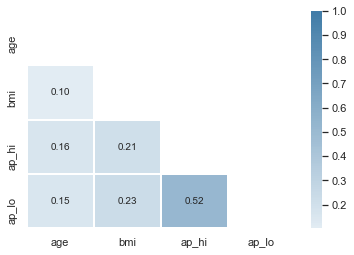

In [142]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)


corr = data[['age','bmi','ap_hi', 'ap_lo']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data[['age','bmi','ap_hi', 'ap_lo']].corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")

**Split into test and train**

In [143]:
data.columns

Index(['id', 'age', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'cholesterol_2', 'cholesterol_3', 'gluc_2',
       'gluc_3'],
      dtype='object')

In [144]:
y=data['cardio']
X=data[['age','gender','bmi','ap_hi', 'ap_lo','cholesterol_2', 'cholesterol_3', 'gluc_2',
       'gluc_3', 'smoke', 'alco','active']]

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,age,0.356326
1,bmi,0.301997
2,ap_hi,0.169527
3,ap_lo,0.086488
4,cholesterol_3,0.025710
5,gender,0.012232
6,active,0.010217
7,cholesterol_2,0.008808
8,smoke,0.007540
9,gluc_2,0.007515


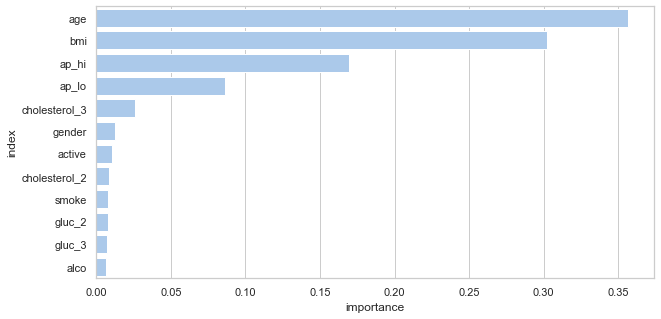

In [147]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[:30],
            label="Total", color="b")

In [148]:
# Create the X and y set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=40)

In [149]:
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()

In [150]:
for ls in ['bmi','ap_hi', 'ap_lo']:
    log.fit(X_train.loc[:,[ls]])
    X_train.loc[:,[ls]] = log.transform(X_train.loc[:,[ls]])
    X_val.loc[:,[ls]] = log.transform(X_val.loc[:,[ls]])

Text(0.5, 1.0, 'bmi Distribution')

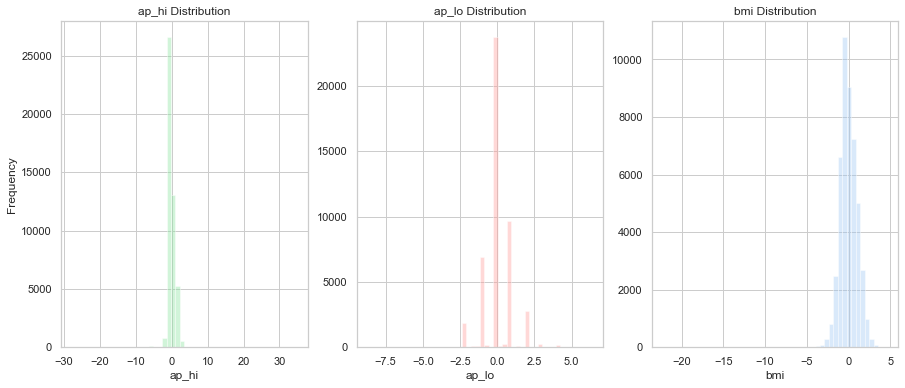

In [159]:
# Plot the distribution of these variables?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# ap_hi
sns.distplot(X_train.ap_hi, kde=False, color="g", ax=axes[0]).set_title('ap_hi Distribution')
axes[0].set_ylabel('Frequency')

# ap_lo
sns.distplot(X_train.ap_lo, kde=False, color="r", ax=axes[1]).set_title('ap_lo Distribution')

# bmi
sns.distplot(X_train.bmi, kde=False, color="b", ax=axes[2]).set_title('bmi Distribution')

**Baseline model**

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

lr = LogisticRegression()

# Fit the model to the data
lr = lr.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_val, lr.predict(X_val))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.73
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5873
           1       0.75      0.68      0.71      5734

    accuracy                           0.73     11607
   macro avg       0.73      0.73      0.73     11607
weighted avg       0.73      0.73      0.73     11607



**Try different models**

In [236]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(XGBClassifier(), methods_data[method][0], methods_data[method][1], cv=10, scoring='roc_auc')
    print(f"The best roc_auc Score for {method} data:")
    print (lr_results.mean())

The best roc_auc Score for Original data:
0.7981090808240839


**Hyperparameter tuning**

In [245]:

housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'subsample': [0.3, 0.5, 0.9],
'learning_rate':[0.1,0.01,0.5],
'n_estimators':[200,300,400]}
gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=XGBClassifier(objective= 'binary:logistic'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 13.7min finished


Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 400, 'subsample': 0.3}
Best ROC found:  0.8962724122094643


In [246]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {'subsample': [0.3, 0.5, 0.9],
'learning_rate':[0.01],
'n_estimators':[400,500],
'max_depth':range(3,10,2),
'min_child_weight':range(1,10,2)}

gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=XGBClassifier(objective= 'binary:logistic'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 62.0min finished


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.3}
Best ROC found:  0.8963178494825552


In [153]:
import lightgbm as lgbm

gbm_param_grid = {
'subsample': [0.3,0.5,0.9,1],
'max_depth':range(3,10,2),
'min_child_weight':range(1,9,2),
'learning_rate':[0.01, 0.05],
'n_estimators':[300,400] ,
'colsample_bytree':[1.0, 0.9, 0.8]
}
#gbm = xgb.XGBClassifier()
grid_mse1 = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)

grid_mse1.fit(X_train, y_train)
print("Best parameters found: ",grid_mse1.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse1.best_score_)))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 23.3min finished


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.3}
Best ROC found:  0.8950922462159429


In [93]:
def conf_matrix(model,X_test,y_test):
  #digits=[0,1]

  y_test_pred = model.predict(X_test)
  cm = confusion_matrix(y_test,y_test_pred)

  akws = {"ha": 'center',"va": 'top'}
  sns.heatmap(cm, annot=True,cmap="Blues",fmt = ".0f", annot_kws=akws) #xticklabels=digits, yticklabels=digits
  plt.title("Confusion Matrix")
  plt.ylabel('Prediction')
  plt.xlabel('Actual')

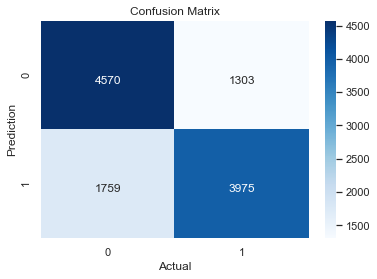

In [154]:
conf_matrix(grid_mse1,X_val,y_val)

In [155]:
y_pred_val=pd.DataFrame(grid_mse1.predict_proba(X_val))[1]
y_pred_val=[0 if x<=0.5 else 1 for x in y_pred_val]

In [156]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5873
           1       0.75      0.69      0.72      5734

    accuracy                           0.74     11607
   macro avg       0.74      0.74      0.74     11607
weighted avg       0.74      0.74      0.74     11607



In [310]:
confusion_matrix(y_val, y_pred_val) 

array([[4566, 1347],
       [1814, 4054]], dtype=int64)

In [300]:
y_train.value_counts()

0    23648
1    23476
Name: cardio, dtype: int64

In [301]:
y_val.value_counts()

0    5913
1    5868
Name: cardio, dtype: int64

Create model dump

In [288]:
import joblib

# save the model to disk

# Without any power transformation and removal of outliers
filename = 'Lgbm_model.sav'
joblib.dump(grid_mse1, filename)

['Lgbm_model.sav']

Things to try:
<li>Remove extreme values
<li>Use power transformation   
<li>Try NB model    